[(975, 4263.8379717569605), (96945, 4263.8379717569605)]


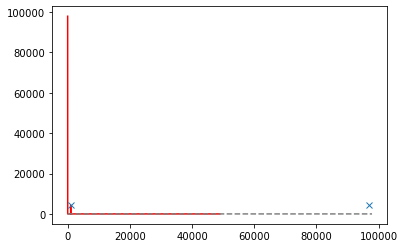

44100

In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from scipy.signal import find_peaks
fs, data = wavfile.read("440hz.wav") # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**16.)*2-1 for ele in a] # this is 16-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
peaks, _ = find_peaks(abs(c), height=1, threshold=1000)
plt.plot(abs(c[:(d-1)]),'r') 
plt.plot(peaks, abs(c[peaks]), "x")
plt.plot(np.zeros_like(abs(c)), "--", color="gray")
print( [(i,j) for i, j in zip(peaks, abs(c[peaks]) )] )  # To print x and corresponding peak at 
plt.show()
fs

In [14]:
>>> import matplotlib
>>> matplotlib.matplotlib_fname()

'C:\\Users\\erike\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [ ]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

number of channels = 2
length = 2.220408163265306s


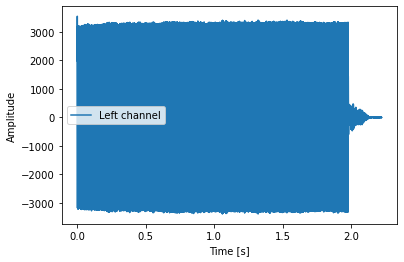

In [102]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
#data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname = pjoin('440hz.wav')
samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")   

import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
timer = time

plt.plot(timer, data[:, 0], label="Left channel")
#plt.plot(timer, abs(data[:, 1]/100), label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [34]:
import soundfile as sf

ob = sf.SoundFile('1000hz.wav')
print('Sample rate: {}'.format(ob.samplerate))
print('Channels: {}'.format(ob.channels))
print('Subtype: {}'.format(ob.subtype))

Sample rate: 44100
Channels: 2
Subtype: PCM_16


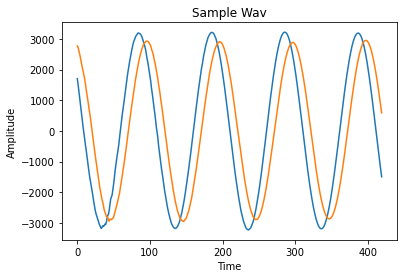

(44100, array([[1982, 1126],
       [2941, 1732],
       [3321, 2058],
       ...,
       [  -5,   -2],
       [  -6,   -2],
       [  -5,   -2]], dtype=int16))


In [115]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("440hz.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[20:440])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()
print(input_data)

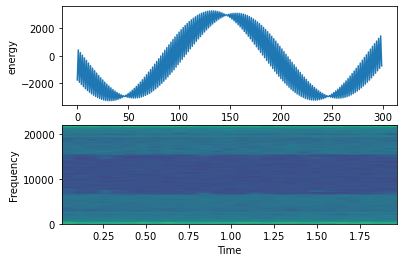

[1982 1126 2941 ...  836 2732 1019]


In [18]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open('440hz.wav', 'r')
sample_rate = 44100
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
plt.figure(1)
sig1=sig[25000:25300]

plot_a = plt.subplot(211)
plot_a.plot(sig1)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=4096, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()
print(sig)

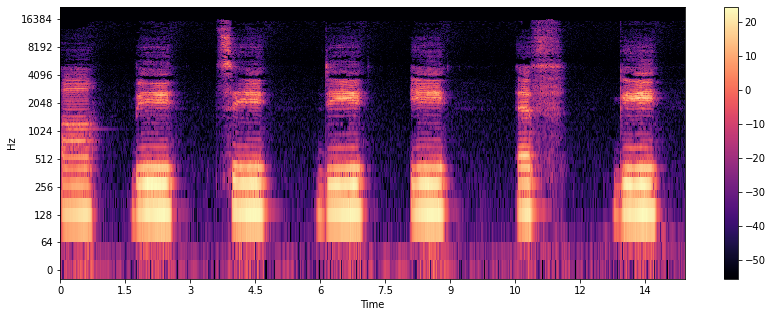

Time (seconds) of last sample: 7.209773242630385
Time (seconds) of last frame:  7.209795918367347
Frequency (Hz) of last bin:    22050.0
Time (seconds) : 317952
Number of frames :  1243
Number of bins :  513


In [28]:

import librosa
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

np.set_printoptions(threshold=sys.maxsize)

filename = 'ABCDEFG.wav'
Fs = 44100
clip, sample_rate = librosa.load(filename, sr=Fs)

n_fft = 1024  # frame length 
start = 0 

hop_length=256

#commented out code to display Spectrogram
X = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='log')
plt.colorbar()
#librosa.display.waveshow(clip, sr=Fs)
plt.show()

#now print all values 

t_samples = np.arange(clip.shape[0]) / Fs
t_frames = np.arange(X.shape[1]) * hop_length / Fs
#f_hertz = np.arange(N / 2 + 1) * Fs / N       # Works only when N is even
f_hertz = np.fft.rfftfreq(n_fft, 1 / Fs)         # Works also when N is odd

#example
print('Time (seconds) of last sample:', t_samples[-1])
print('Time (seconds) of last frame: ', t_frames[-1])
print('Frequency (Hz) of last bin:   ', f_hertz[-1])

print('Time (seconds) :', len(t_samples))

#prints array of time frames 
#print('Time of frames (seconds) : ', t_frames)
#prints array of frequency bins
#print('Frequency (Hz) : ', f_hertz)

print('Number of frames : ', len(t_frames))
print('Number of bins : ', len(f_hertz))

#This code is working to printout frame by frame intensity of each frequency
#on top line gives freq bins
#curLine = 'Bins,'
#for b in range(1, len(f_hertz)):
#    curLine += str(f_hertz[b]) + ','
#print(curLine)

#curLine = ''
#for f in range(1, len(t_frames)):
#    curLine = str(t_frames[f]) + ','
#    for b in range(1, len(f_hertz)): #for each frame, we get list of bin values printed
#        curLine += str("%.02f" % np.abs(X[b, f])) + ','
#        #remove format of the float for full details if needed
        #curLine += str(np.abs(X[b, f])) + ','
        #print other useful info like phase of frequency bin b at frame f.
        #curLine += str("%.02f" % np.angle(X[b, f])) + ',' 
#    print(curLine)